In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
plt.style.use(['science', 'no-latex'])
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

file_list = os.listdir()
file_list = [_file for _file in file_list if 'FashionMNIST' in _file]

['categorical_otdd_naive-curriculum_torchvision.datasets.mnist.MNIST_classes.5.pkl', 'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_classes.5.pkl', 'categorical_otdd_naive-curriculum_torchvision.datasets.cifar.CIFAR10_classes.5.pkl']


,between-algorithms,algorithm-CD,algorithm-random
MNIST,0.306901,0.337315,0.355784
FashionMNIST,0.326334,0.320528,0.353138
CIFAR10,0.318075,0.336391,0.345534


<Figure size 900x900 with 0 Axes>

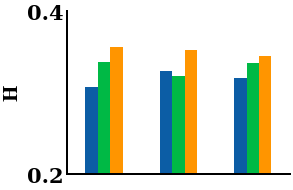

In [2]:
df_columns = ['between-algorithms', 'algorithm-CD', 'algorithm-random']
dataset_files = [
    'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.MNIST_classes.5.pkl',
    'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_classes.5.pkl',
    'categorical_otdd_naive-curriculum_torchvision.datasets.cifar.CIFAR10_classes.5.pkl',
]

mpl.rcParams['axes.linewidth'] = 2
plt.figure(figsize=(9, 9), dpi=100)
lr_dfs = []
lr_files = [_file for _file in dataset_files]
print(lr_files)
for lr_file in lr_files:
    lr_dfs.append(pd.read_pickle(lr_file))

res_df_1 = pd.DataFrame(columns=df_columns)
for idx, lr_df in enumerate(lr_dfs):
    res_df_1.loc[idx] = lr_df.iloc[-1].values
res_df_1.index = ['MNIST', 'FashionMNIST', 'CIFAR10']
res_df_1 = res_df_1.div(res_df_1.sum(axis=1), axis=0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
res_df_1.plot.bar(ax=axes, rot=315)
# axes.set_xlabel('datasets')
axes.set_ylabel('H', fontdict={'weight': 'bold', 'size': 21, 'fontname': 'TImes New Roman'})
axes.set_ylim(bottom=0.20, top=0.50)
plt.tick_params(axis="x", which="both", bottom=False, top=False)
plt.tick_params(axis="y", which="both", left=False, right=False)
plt.ylim(0.2, 0.4)
plt.yticks([0.2, 0.4], weight='bold', size=21)
plt.xticks([], weight='bold', size=21)
plt.legend([])
# fig.savefig('paper.fig.dataset.png', dpi=100, bbox_inches='tight')
old_df = res_df_1
old_df

['categorical_otdd_naive-curriculum_utils.custom_datasets.CustomNovelNet.pkl']


,algorithm-humans,CD-humans,random-humans
NOD,0.245706,0.375389,0.378905


<Figure size 800x300 with 0 Axes>

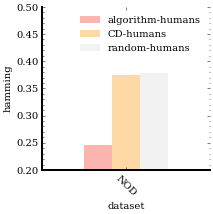

In [3]:
df_columns = ['algorithm-humans', 'CD-humans', 'random-humans']
dataset_files = [
    'categorical_otdd_naive-curriculum_utils.custom_datasets.CustomNovelNet.pkl'
]

plt.figure(figsize=(8, 3), dpi=100)
lr_dfs = []
lr_files = [_file for _file in dataset_files]
print(lr_files)
for lr_file in lr_files:
    lr_dfs.append(pd.read_pickle(lr_file))

res_df_1 = pd.DataFrame(columns=df_columns)
for idx, lr_df in enumerate(lr_dfs):
    res_df_1.loc[idx] = lr_df.iloc[-1].values
res_df_1.index = ['NOD']
res_df_1 = res_df_1.div(res_df_1.sum(axis=1), axis=0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
colors = plt.cm.Pastel1(np.linspace(0, 1, 3))
res_df_1.plot.bar(ax=axes, rot=315, color=colors)
axes.set_xlabel('dataset')
axes.set_ylabel('hamming')
axes.set_ylim(bottom=0.20, top=0.5)
# fig.savefig('paper.fig.human.png', dpi=100, bbox_inches='tight')
new_df = res_df_1
new_df

              between-algorithms  algorithm-CD  algorithm-random
MNIST                   0.306901      0.337315          0.355784
FashionMNIST            0.326334      0.320528          0.353138
CIFAR10                 0.318075      0.336391          0.345534
     algorithm-humans  CD-humans  random-humans
NOD          0.245706   0.375389       0.378905


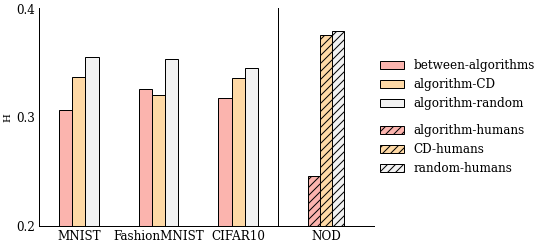

In [4]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4), gridspec_kw={'width_ratios': [2.5, 1]})
colors = plt.cm.Pastel1(np.linspace(0, 1, 3))
old_df.plot.bar(ax=axes[0], rot=0, color=colors, linewidth=1, edgecolor='black', 
                fontsize='large')
    new_df.plot.bar(ax=axes[1], rot=0, hatch='///', width=0.3, color=colors, linewidth=1, edgecolor='black',
                fontsize='large')

# axes[1].set_ylabel('hamming')
axes[0].set_ylabel('H')

axes[1].set_yticks([])
axes[0].set_yticks([0.2, 0.3, 0.4])

axes[1].legend(ncol=1, loc='center', bbox_to_anchor=(1.82, 0.35), fontsize='large')
axes[0].legend(ncol=1, loc='center', bbox_to_anchor=(1.75, 0.65), fontsize='large')

axes[1].set_ylim(bottom=0.20, top=0.40)
axes[0].set_ylim(bottom=0.20, top=0.40)

axes[1].tick_params(axis="x", which="both", bottom=False, top=False)
axes[1].tick_params(axis="y", which="both", left=False, right=False)
axes[0].tick_params(axis="x", which="both", bottom=False, top=False)
axes[0].tick_params(axis="y", which="both", left=False, right=False)

plt.subplots_adjust(wspace=0)

# fig.savefig('paper.fig.comb.png', dpi=100, bbox_inches='tight')

print(old_df)
print(new_df)

['categorical_otdd_naive-curriculum_torchvision.datasets.mnist.MNIST.pkl', 'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST.pkl', 'categorical_otdd_naive-curriculum_torchvision.datasets.cifar.CIFAR10.pkl']


,between-algorithms,algorithm-CD,algorithm-random
MNIST,0.328756,0.337079,0.334166
FashionMNIST,0.327399,0.344059,0.328541
CIFAR10,0.327444,0.330504,0.342052


<Figure size 900x900 with 0 Axes>

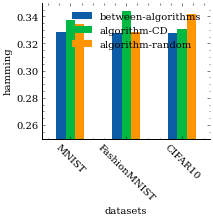

In [6]:
df_columns = ['between-algorithms', 'algorithm-CD', 'algorithm-random']
dataset_files = [
    'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.MNIST.pkl',
    'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST.pkl',
    'categorical_otdd_naive-curriculum_torchvision.datasets.cifar.CIFAR10.pkl',
]

plt.figure(figsize=(9, 9), dpi=100)
lr_dfs = []
lr_files = [_file for _file in dataset_files]
print(lr_files)
for lr_file in lr_files:
    lr_dfs.append(pd.read_pickle(lr_file))

res_df_1 = pd.DataFrame(columns=df_columns)
for idx, lr_df in enumerate(lr_dfs):
    res_df_1.loc[idx] = lr_df.iloc[-1].values
res_df_1.index = ['MNIST', 'FashionMNIST', 'CIFAR10']
res_df_1 = res_df_1.div(res_df_1.sum(axis=1), axis=0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 2.5))
res_df_1.plot.bar(ax=axes, rot=315)
axes.set_xlabel('datasets')
axes.set_ylabel('hamming')
axes.set_ylim(bottom=0.25, top=0.35)
# fig.savefig('paper.fig.dataset.10.png', dpi=100, bbox_inches='tight')
old_df = res_df_1
old_df

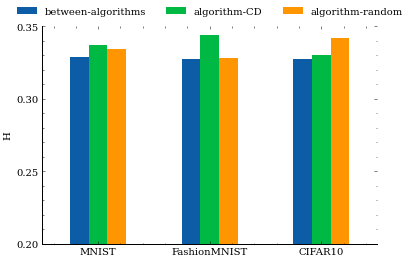

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
old_df.plot.bar(ax=axes, rot=0)

axes.set_ylabel('H')

axes.set_yticks([0.2, 0.25, 0.3, 0.35])

axes.legend(ncol=3, loc='center', bbox_to_anchor=(0.5, 1.07), fontsize='medium')

axes.set_ylim(bottom=0.20, top=0.35)

plt.subplots_adjust(wspace=0)

# fig.savefig('paper.fig.comb.10.png', dpi=100, bbox_inches='tight')